# QF600 - Homework 4
*by Julian Chang*
> ## Efficient Frontier Revisited

In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
df_industries = pd.read_excel('./data/Industry_Portfolios.xlsx', index_col='Date')
df_market = pd.read_excel('./data/Market_Portfolio.xlsx', index_col='Date')
df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

> ### Part 1: Minimum-Tracking-Error Frontier
> Let market return be the target return. Estimate expected deviation from market return, for the ten industry portfolios:
$$
R_i = \mathbb{E}\left[\tilde{R_i}-\tilde{R_m}\right]
$$


In [2]:
deviations = df_industries.values - df_market['Market'].values[:, np.newaxis]   # R_i - R_m, 
R = np.mean(deviations,   # and get mean deviation
            axis=0)

pd.DataFrame(
            {'Mean Monthly Deviation %': R},
            index=df_industries.columns    
            )

,Mean Monthly Deviation %
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


> Also estimate covariance matrix of return deviations, for the ten industry portfolios:
$$
V_{ij} = \text{Cov}\left[ \left( \tilde{R_i} - \tilde{R_m} \right), \left( \tilde{R_j} - \tilde{R_m} \right) \right]
$$

In [3]:
V = np.cov(deviations,rowvar=False)     # get cov matrix

pd.DataFrame(
            V,
            columns=df_industries.columns,    
            index=df_industries.columns    
            ).round(4)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.4397,-6.0730,-1.3962,-1.2005,-1.8832,1.5389,1.1407,3.8151,4.2720,-1.7687
Durbl,-6.0730,26.6289,4.9080,-3.4811,1.8916,-1.7076,-0.3543,-8.0829,-9.6175,4.3859
Manuf,-1.3962,4.9080,2.9505,1.6661,0.0653,-0.6264,-1.1546,-2.2889,-1.9014,0.3589
Enrgy,-1.2005,-3.4811,1.6661,19.2749,-1.5170,-1.0405,-3.7104,-2.4858,4.4544,-3.8648
HiTec,-1.8832,1.8916,0.0653,-1.5170,5.0987,-0.7733,-0.2454,-1.9363,-2.3428,-1.4041
Telcm,1.5389,-1.7076,-0.6264,-1.0405,-0.7733,4.6826,0.4638,0.6932,2.7215,-1.2718
Shops,1.1407,-0.3543,-1.1546,-3.7104,-0.2454,0.4638,4.4526,0.7645,-0.1767,-0.2570
Hlth,3.8151,-8.0829,-2.2889,-2.4858,-1.9363,0.6932,0.7645,7.8204,3.4961,-1.7268
Utils,4.2720,-9.6175,-1.9014,4.4544,-2.3428,2.7215,-0.1767,3.4961,12.2675,-4.0551
Other,-1.7687,4.3859,0.3589,-3.8648,-1.4041,-1.2718,-0.2570,-1.7268,-4.0551,4.5032


> Plot the minimum-tracking-error frontier generated by the ten industry portfolios: 

Using the formulas
$$
\begin{align}
\alpha = \mathbf{R'V^{-1}e}; \quad \zeta &= \mathbf{R'V^{-1}R}; \quad \delta = \mathbf{e'V^{-1}e} \notag \\
\sigma_p^2 &= \frac{1}{\delta} + \frac{\delta}{\zeta\delta-\alpha^2}(R_p-R_{mv})^2 \notag \\
\end{align}
$$

where \
R is the mean deviation \
V is the covariance matrix \
e is 1 x n matrix 


In [4]:
e = np.ones(len(df_industries.columns)).T
alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta


> - This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.
> - This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).
>
> Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

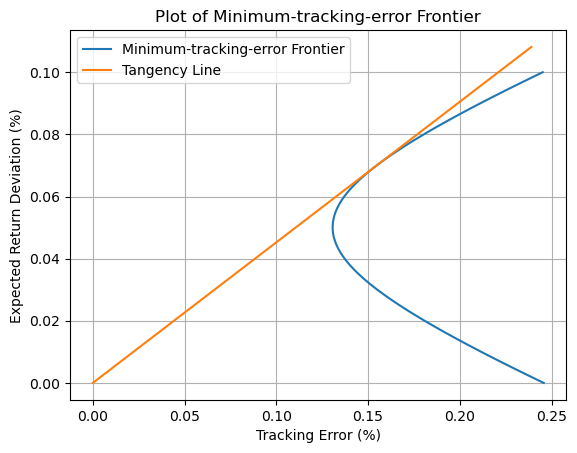

In [5]:
R_deviation = np.arange(0,.101,.001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_deviation-R_mv)**2)**.5

R_f = 0
sig_p_mvf = np.arange(0,.24,.001)
R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_deviation, label="Minimum-tracking-error Frontier")
plt.plot(sig_p_mvf, R_p_mvf, label="Tangency Line")
plt.xlabel("Tracking Error (%)")  # X-axis label
plt.ylabel("Expected Return Deviation (%)")         # Y-axis label
plt.title("Plot of Minimum-tracking-error Frontier")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()


> Calculate information ratio and portfolio weights for the "tangency" portfolio.


$$ R_{tg} = \frac{\alpha R_f-\zeta}{\delta R_f-\alpha}; \quad \sigma_{tg}=-\frac{(\zeta-2\alpha R_f+\delta R_f^2)^{1/2}}{\delta(R_f-R_{mv})}; \quad \text{Information Ratio} = \frac{R_{tg}-R_f}{\sigma_{tg}}$$


Using the formulas for efficient frontier and taking R_f values as 0

In [6]:
R_tg = (alpha*R_f-zeta)/(delta*R_f-alpha)
sig_tg = -(zeta-2*alpha*R_f+delta*R_f**2)**.5/(delta*(R_f-R_mv))
info_ratio = (R_tg-R_f)/sig_tg

print(f"Information Ratio:\t{info_ratio:.4f}")

Information Ratio:	0.4525


In [7]:
w_star = (delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.linalg.inv(V)@R \
         +(zeta-alpha*R_tg)/(zeta*delta-alpha**2)*np.linalg.inv(V)@e
print(f"tangency portfolio weights")
pd.DataFrame(w_star, df_industries.columns,columns=['Weights']).round(4)

tangency portfolio weights


,Weights
NoDur,0.0526
Durbl,0.0002
Manuf,0.1376
Enrgy,0.0870
HiTec,0.1794
Telcm,0.0711
Shops,0.1069
Hlth,0.1028
Utils,0.0402
Other,0.2223


> ### Part 2: Minimum-Variance Frontier w/o Short Sales
>
> Use Monte Carlo method to simulate the minimum-variance frontier without short sales, generated by the ten industry portfolios. Portfolio weights will be limited to the range [0, 1].
>
> Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of portfolio weights, to ensure that the portfolio weights sum to one. This normalised w represents portfolio weights for one simulated portfolio, without short sales.
>
> Use the normalised w along with the vector of mean returns and the covariance matrix of returns (for the ten industry portfolios) to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 10^5 data points.
>
> Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

Using 
$$
\sigma^2 = w^T V w
$$


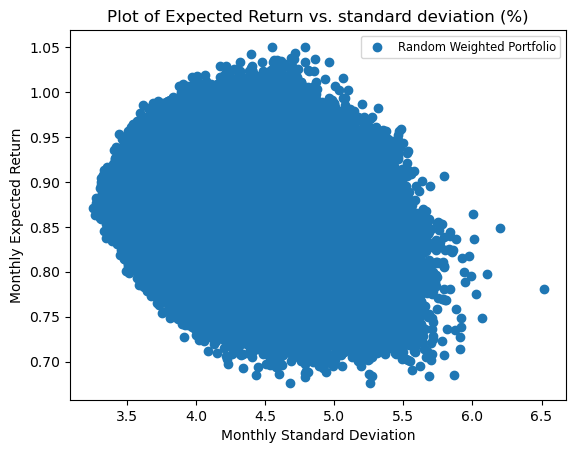

In [8]:
num_samples = 10**7
random_weights = np.random.rand(num_samples, 10)  # 10 random weights for each sample
w = random_weights / random_weights.sum(axis=1, keepdims=True)  # Normalize

# Calculate mean returns and covariance to obtain standard deviation for all samples
R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values
R_i = w @ R_mvf                                 # Expected returns
sig_i = np.sqrt(np.sum(w @ V_mvf * w, axis=1))  # Standard deviations

# Plot results
plt.xlabel("Monthly Standard Deviation")     
plt.ylabel("Monthly Expected Return")  
plt.title("Plot of Expected Return vs. standard deviation (%)")  
plt.scatter(sig_i,R_i, label="Random Weighted Portfolio")
plt.legend(loc='upper right', fontsize='small')
plt.show()


> Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.
>
> Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

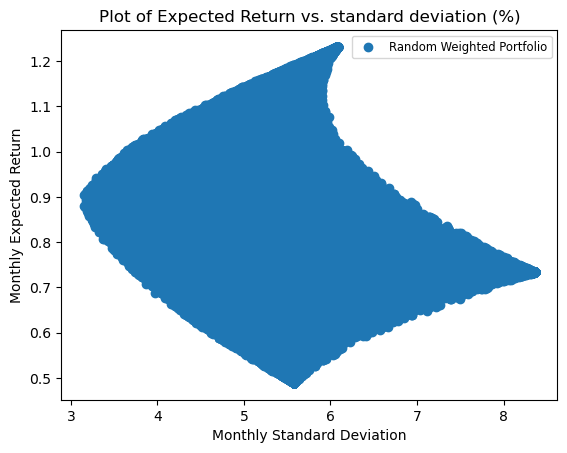

In [9]:
# Repeat avoe analysis with reciproval of weights
num_samples = 10**7
random_weights = 1/np.random.rand(num_samples, 10) 
w = random_weights / random_weights.sum(axis=1, keepdims=True) 

R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values
R_i = w @ R_mvf 
sig_i = np.sqrt(np.sum(w @ V_mvf * w, axis=1))

plt.xlabel("Monthly Standard Deviation")     
plt.ylabel("Monthly Expected Return")  
plt.title("Plot of Expected Return vs. standard deviation (%)")  
plt.scatter(sig_i,R_i, label="Random Weighted Portfolio")
plt.legend(loc='upper right', fontsize='small')
plt.show()